# Student Performance Prediction

## In this project , 
##  > the Math and Portuguese datasets are loaded and merged into one.
##  > This merged dataset is then used of Data preprocessing. 
##  > After the data-preprocessing the dataset is splitted for training and testing.
##  > Then using Rondom Forest Classifier the feature selection is done.
##  > Features that are highly correlated and used to build model are 'Failures', 'absences',          'G1'  and 'G2'.
##  > using the Hyper-parameter tuning technique, GridsearchCV best parameters are    chosen on two different models and are trained using them.
##  > I used different models but the accuracy was less.
##  > The output variable G3 is categorised into 5 categories namely:
##                  S grade : 18 to 20
##                  A grade : 15 to 17
##                  B grade : 11 to 14
##                  C grade : 06 to 10
##                  F grade :  00 to 05 ( Fail)
  
##  Result : Using both the model Decision Tree Classifier and Rondom Forest Classifier, we got an accuracy of around 82%

__Importing necessary Libraries.__

In [58]:
import time
# import graphviz
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import roc_auc_score
from sklearn import tree





__Loading the Dataset.__

In [2]:
df_mat = pd.read_csv('C:/Users/ARK/Desktop/student performance prediction/student-mat.csv', sep=';')
df_por = pd.read_csv('C:/Users/ARK/Desktop/student performance prediction/student-por.csv', sep=';')

In [64]:
df_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,Maths
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,Maths
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,Maths
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,Maths
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,Maths


In [4]:
df_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


__Adding the Subject Column__

In [5]:
df_por['subject']='Portuguese'

In [6]:
df_mat['subject']='Maths'

__Joining the Datasets__

In [7]:
df = pd.concat([df_por, df_mat], axis=0) 

In [8]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,Portuguese
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,Portuguese
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,Portuguese
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,Portuguese
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,Portuguese


__Data Prepocessing__

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 394
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher   

In [10]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [11]:
df.skew().to_frame('Skewness Measure')

,Skewness Measure
age,0.434028
Medu,-0.139528
Fedu,0.119447
traveltime,1.369314
studytime,0.670982
failures,2.783660
famrel,-1.055775
freetime,-0.178707
goout,0.038928
Dalc,2.157973


<AxesSubplot:>

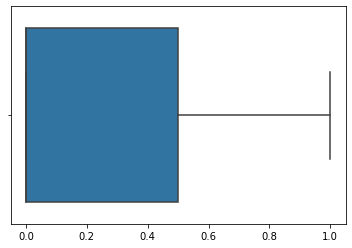

In [60]:
sns.boxplot(df.all())

In [12]:
df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
subject       0
dtype: int64

In [14]:
df['FinalGrade'] = 'na'
df.loc[(df.G3 >= 18) & (df.G3 <= 20), 'FinalGrade'] = 'S'
df.loc[(df.G3 >= 15) & (df.G3 <= 17), 'FinalGrade'] = 'A' 
df.loc[(df.G3 >= 11) & (df.G3 <= 14), 'FinalGrade'] = 'B' 
df.loc[(df.G3 >= 6) & (df.G3 <= 10), 'FinalGrade'] = 'C' 
df.loc[(df.G3 >= 0) & (df.G3 <= 5), 'FinalGrade'] = 'F' 
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,subject,FinalGrade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,4,0,11,11,Portuguese,B
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,2,9,11,11,Portuguese,B
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,6,12,13,12,Portuguese,B
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,0,14,14,14,Portuguese,B
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,0,11,13,13,Portuguese,B


In [15]:
class_le = LabelEncoder()
for column in df[["school", "sex", "address", "famsize", "Pstatus", "Mjob", "Fjob", "reason", "guardian", "schoolsup", "famsup", "paid", "activities", "nursery", "higher", "internet", "romantic","FinalGrade","subject"]].columns:
        df[column] = class_le.fit_transform(df[column].values)

In [16]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,subject,FinalGrade
0,0,0,18,1,0,0,4,4,0,4,...,4,1,1,3,4,0,11,11,1,1
1,0,0,17,1,0,1,1,1,0,2,...,3,1,1,3,2,9,11,11,1,1
2,0,0,15,1,1,1,1,1,0,2,...,2,2,3,3,6,12,13,12,1,1
3,0,0,15,1,0,1,4,2,1,3,...,2,1,1,5,0,14,14,14,1,1
4,0,0,16,1,0,1,3,3,2,2,...,2,1,2,5,0,11,13,13,1,1


In [17]:
data = df.drop(["G3"], axis = 1)

In [18]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,subject,FinalGrade
0,0,0,18,1,0,0,4,4,0,4,...,3,4,1,1,3,4,0,11,1,1
1,0,0,17,1,0,1,1,1,0,2,...,3,3,1,1,3,2,9,11,1,1
2,0,0,15,1,1,1,1,1,0,2,...,3,2,2,3,3,6,12,13,1,1
3,0,0,15,1,0,1,4,2,1,3,...,2,2,1,1,5,0,14,14,1,1
4,0,0,16,1,0,1,3,3,2,2,...,3,2,1,2,5,0,11,13,1,1


In [19]:
x = data.drop(["FinalGrade"],axis = 1)
x.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,subject
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,4,0,11,1
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,2,9,11,1
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,6,12,13,1
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,0,14,14,1
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,0,11,13,1


In [20]:
y = data['FinalGrade']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: FinalGrade, dtype: int32

__Splitting the Data__

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [22]:
x_train.shape

(730, 33)

In [23]:
y_train.shape

(730,)

In [24]:
x_test.shape

(314, 33)

In [25]:
y_test.shape

(314,)

In [ ]:
__Feature Selection using Random Forest Classifier__

In [50]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(x_train, y_train)
selected_feat= x_train.columns[(sel.get_support())]
print(selected_feat)

Index(['G1', 'G2'], dtype='object')


In [46]:
x_train= x_train[['failures', 'absences', 'G1', 'G2']]
x_train.head()

,failures,absences,G1,G2
24,0,2,10,11
186,0,2,11,12
324,0,0,16,15
269,0,7,14,14
593,0,0,12,13


In [28]:
x_test= x_test[['failures', 'absences', 'G1', 'G2']]
x_test.head()

,failures,absences,G1,G2
22,0,2,15,15
4,0,0,11,13
270,0,4,14,15
305,1,8,14,12
82,0,10,7,6


__Hyper-parameter Tuning using Grid Search CV on Decision Tree Classifier__

In [29]:
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(x_train, y_train)
grid_search_cv.best_estimator_

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 882 out of 882 | elapsed:   11.8s finished


DecisionTreeClassifier(max_leaf_nodes=14, random_state=42)

__Decision Tree Model__

In [30]:
dtree = DecisionTreeClassifier(criterion='gini',random_state=42,max_leaf_nodes=13)
dtree.fit(x_train,y_train)
dt_pred = dtree.predict(x_test)
DT_accuracy = accuracy_score(y_test,dt_pred)
print('\n Confusion matrix \n\n', confusion_matrix(y_test,dt_pred))
print('\n Accuracy score \n', DT_accuracy*100)
print('\n Classification Report \n\n', classification_report(y_test,dt_pred))


 Confusion matrix 

 [[ 37   9   0   0   8]
 [  1 120  21   0   0]
 [  0   5  85   0   0]
 [  0   0  11   4   0]
 [  1   0   0   0  12]]

 Accuracy score 
 82.16560509554141

 Classification Report 

               precision    recall  f1-score   support

           0       0.95      0.69      0.80        54
           1       0.90      0.85      0.87       142
           2       0.73      0.94      0.82        90
           3       1.00      0.27      0.42        15
           4       0.60      0.92      0.73        13

    accuracy                           0.82       314
   macro avg       0.83      0.73      0.73       314
weighted avg       0.85      0.82      0.82       314



__Hyper-parameter Tuning using Gridsearch CV on Random Forest Classifier__

In [53]:
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [55]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'auto',
 'n_estimators': 500}

__Random Forest Classifier Model__

In [56]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 500, max_depth=6, criterion='gini')
rfc1.fit(x_train, y_train)
pred=rfc1.predict(x_test)
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))

Accuracy for Random Forest on CV data:  0.8280254777070064
